# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import pandas as pd
import numpy as np

# TODO: Fill this in based on where you saved the training and testing data

training_file = '../traffic_signs_data/train.p'
validation_file= '../traffic_signs_data/valid.p'
testing_file = '../traffic_signs_data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print(X_train.shape)
print(y_train.shape)

csv_data = pd.read_csv('./signnames.csv')
print(csv_data)
print(csv_data.shape)
# print(csv_data['SignName'][0])


(34799, 32, 32, 3)
(34799,)
    ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vehicles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0,...].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = csv_data.shape[0]

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_validation)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Visualizations will be shown in the notebook.
%matplotlib inline
from collections import defaultdict

train_dist = defaultdict()
val_dist = defaultdict()
test_dist = defaultdict()

train_visual = defaultdict()


for i in range(n_classes):
    train_dist[csv_data['SignName'][i]] = np.sum((y_train == i))
    val_dist[csv_data['SignName'][i]] = np.sum((y_valid == i))
    test_dist[csv_data['SignName'][i]] = np.sum((y_test == i))

    train_visual[csv_data['SignName'][i]] = X_train[y_train == i,...][0]




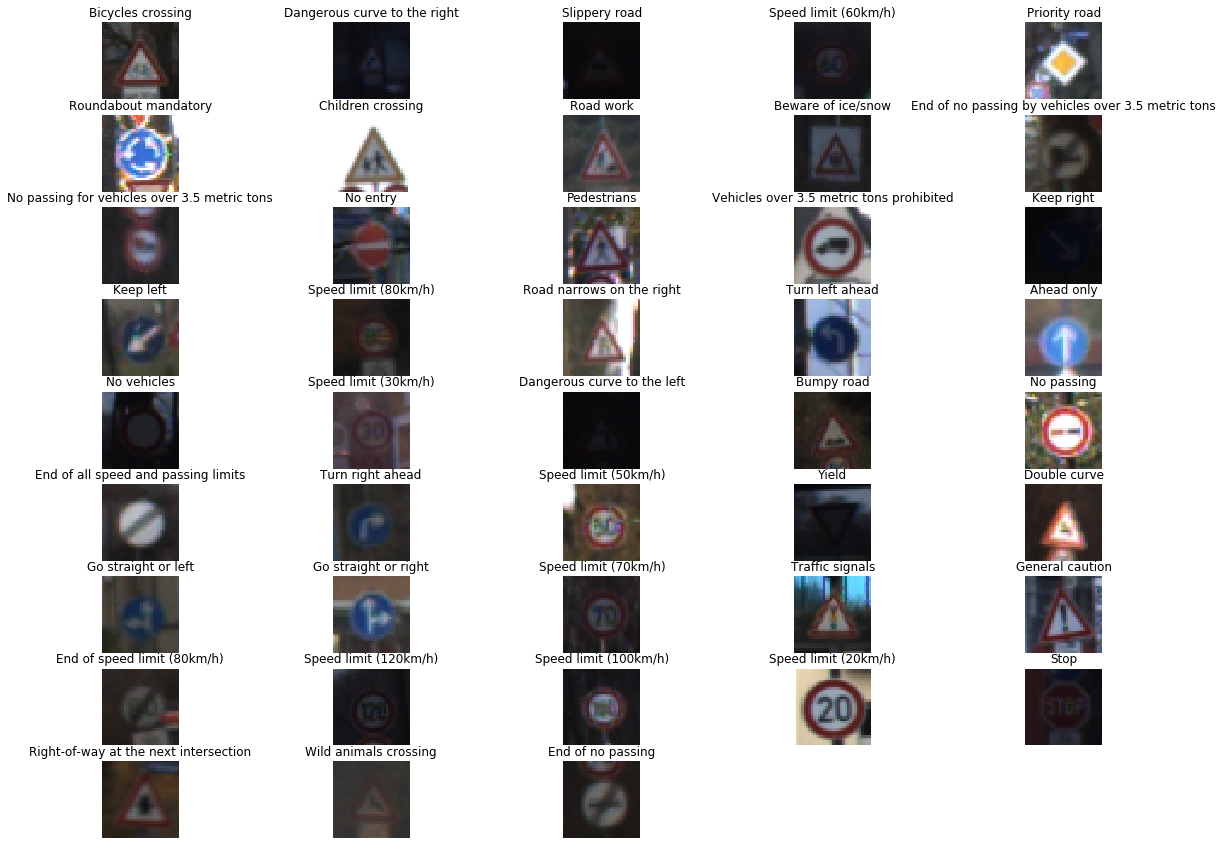

In [4]:
plt.figure(figsize=(20,15))
gs1 = gridspec.GridSpec(9,5)

for idx, key in enumerate(train_visual.keys()):
    
    ax = plt.subplot(gs1[idx])
    ax.set_axis_off()
    ax.imshow(train_visual[key])
    ax.set_title(key)
# plt.savefig('./output/cls_example_visual.png')
plt.show()

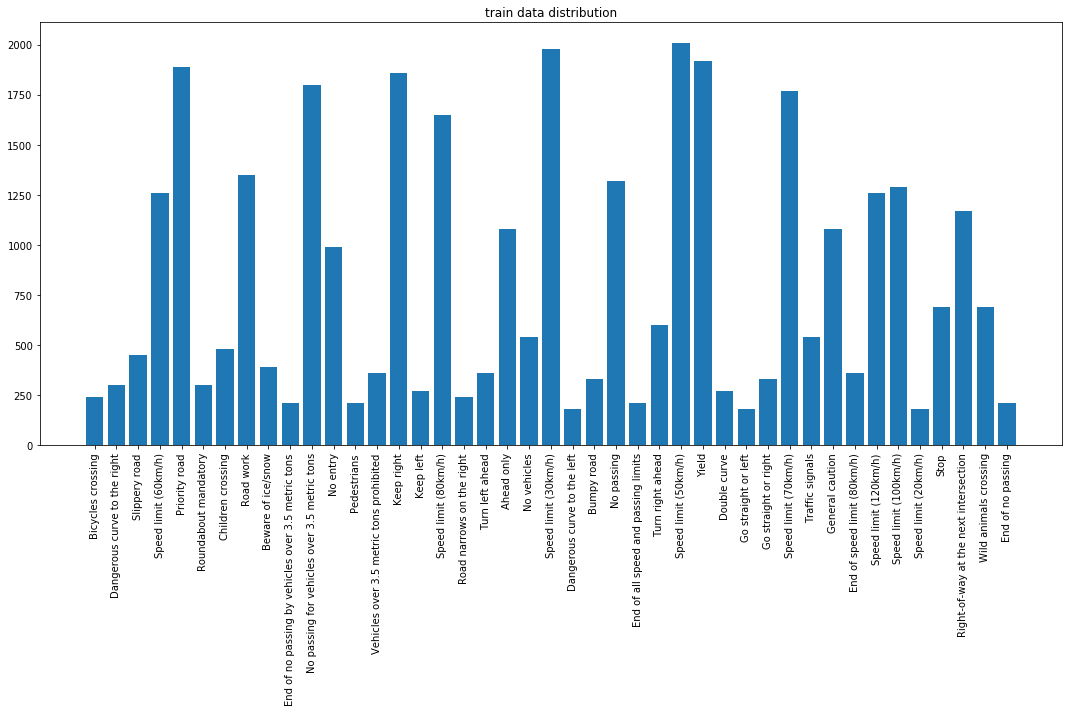

In [121]:

plt.figure(figsize=(15,10))
plt.bar(list(range(0,n_classes)), train_dist.values())
plt.xticks(list(range(0,n_classes)),train_dist.keys(),rotation=90)
plt.title('train data distribution')
plt.tight_layout()
# plt.savefig('./output/train_data_dist.png')
plt.show()


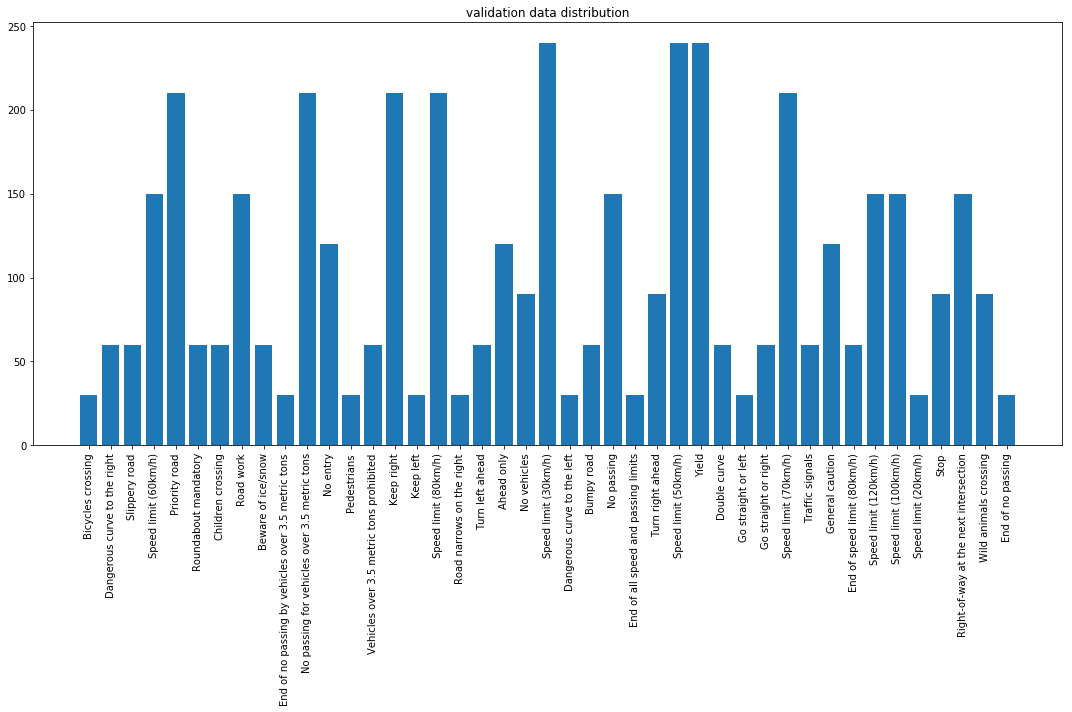

In [123]:
plt.figure(figsize=(15,10))
plt.bar(list(range(0,n_classes)), val_dist.values())
plt.xticks(list(range(0,n_classes)), val_dist.keys(), rotation=90)
plt.title('validation data distribution')
plt.tight_layout()
# plt.savefig('./output/val_data_dist.png')
plt.show()


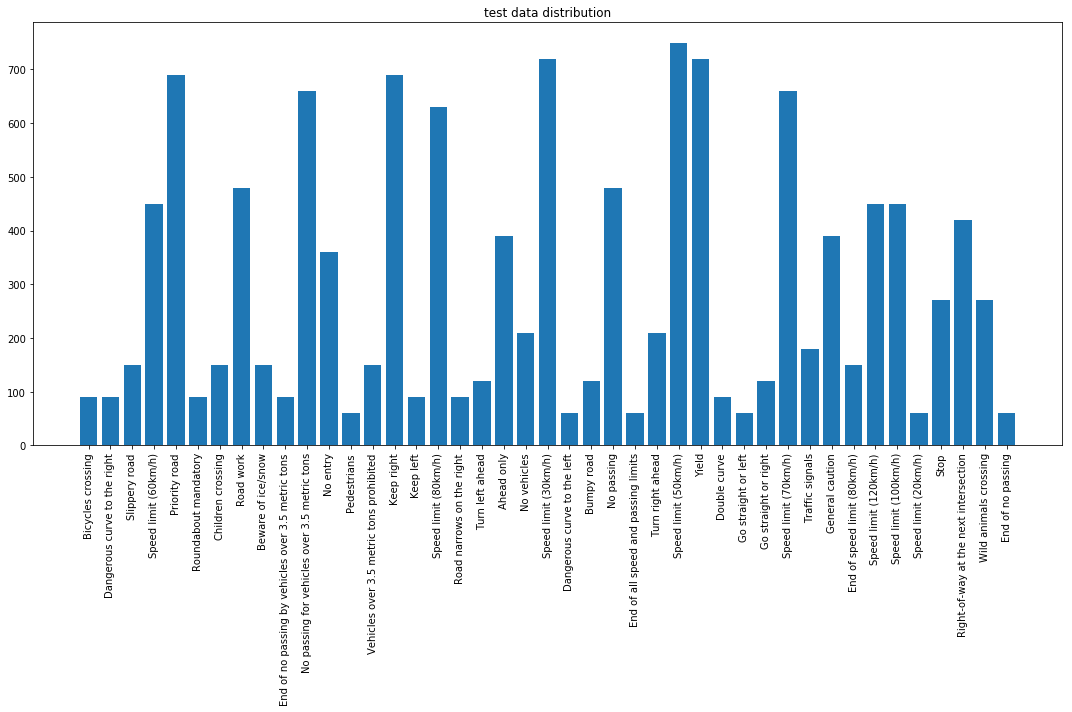

In [124]:
plt.figure(figsize=(15,10))
plt.bar(list(range(0,n_classes)), test_dist.values())
plt.xticks(list(range(0,n_classes)), test_dist.keys(), rotation=90)
plt.title('test data distribution')
plt.tight_layout()
# plt.savefig('./output/test_data_dist.png')
plt.show()


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [4]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

def simple_norm(data):
    data_norm = (data - 128)/128
    return data_norm

In [5]:
def min_max_norm(data):
    data_norm = data/255
    return data_norm

In [6]:
def rgb2gray(rgb):
    return np.expand_dims(np.dot(rgb[...,:3], [0.299, 0.587, 0.114]), axis=3)

In [7]:
def zero_one_norm(data):
    data_norm = (data - np.mean(data, axis=(1,2), keepdims=True))/np.std(data, axis=(1,2), keepdims=True)
    return data_norm
    

### Model Architecture

In [82]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf
from tensorflow.contrib.layers import flatten



def LeNet(x, gray=False):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    if gray:
        x = tf.nn.conv2d(x, filter=tf.Variable(tf.truncated_normal((5,5,1,6),mean=mu,stddev=sigma)),strides=[1,1,1,1],
                     padding='VALID')
    else:
        # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
        x = tf.nn.conv2d(x, filter=tf.Variable(tf.truncated_normal((5,5,3,6),mean=mu,stddev=sigma)),strides=[1,1,1,1],
                     padding='VALID')
    x = tf.nn.bias_add(x, tf.Variable(tf.zeros(6)))
    # TODO: Activation.
    x = tf.nn.relu(x)
    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    x = tf.nn.max_pool(x, ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    x = tf.nn.conv2d(x, filter=tf.Variable(tf.truncated_normal((5,5,6,16),mean=mu,stddev=sigma)),strides=[1,1,1,1],
                   padding='VALID')
    x = tf.nn.bias_add(x, tf.Variable(tf.zeros(16)))
    # TODO: Activation.
    x = tf.nn.relu(x)
    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    x = tf.nn.max_pool(x, ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')
    # TODO: Flatten. Input = 5x5x16. Output = 400.
    x = flatten(x)
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    x = tf.matmul(x, tf.Variable(tf.truncated_normal((400,120),mean=mu,stddev=sigma))) + tf.Variable(tf.zeros((120)))
    # TODO: Activation.
    x = tf.nn.relu(x)
    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    x = tf.matmul(x, tf.Variable(tf.truncated_normal((120,84),mean=mu,stddev=sigma))) + tf.Variable(tf.zeros((84)))
    # TODO: Activation.
    x = tf.nn.relu(x)
    # TODO: Layer 5: Fully Connected. Input = 84. Output = 10.
    logits = tf.matmul(x, tf.Variable(tf.truncated_normal((84,43),mean=mu,stddev=sigma))) + tf.Variable(tf.zeros((43)))
    return logits




### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [13]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

from sklearn.utils import shuffle

rate = 0.001
EPOCHS = 20
BATCH_SIZE = 128


def train_vali_network(X_train_norm, X_valid_norm, y_train, y_valid, gray = False, validate = True):
        
    if gray:
        x = tf.placeholder(tf.float32, (None, 32, 32, 1))
    else:   
        x = tf.placeholder(tf.float32, (None, 32, 32, 3))
    y = tf.placeholder(tf.int32, (None))
    one_hot_y = tf.one_hot(y, 43)


    logits = LeNet(x, gray = gray)
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
    loss_operation = tf.reduce_mean(cross_entropy)
    optimizer = tf.train.AdamOptimizer(learning_rate = rate)
    training_operation = optimizer.minimize(loss_operation)


    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
    accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    saver = tf.train.Saver()

    def evaluate(X_data, y_data):
        num_examples = len(X_data)
        total_accuracy = 0
        sess = tf.get_default_session()
        for offset in range(0, num_examples, BATCH_SIZE):
            batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
            accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
            total_accuracy += (accuracy * len(batch_x))
        return total_accuracy / num_examples


    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        num_examples = n_train

        print("Training...")
        print()
        val_acc = []
        for i in range(EPOCHS):
            X_train_, y_train_ = shuffle(X_train_norm, y_train)

            for offset in range(0, num_examples, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = X_train_[offset:end], y_train_[offset:end]
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})

            validation_accuracy = evaluate(X_valid_norm, y_valid)
            print("EPOCH {} ...".format(i+1))
            print("Validation Accuracy = {:.3f}".format(validation_accuracy))
            print()
            val_acc.append(validation_accuracy)
        
#         saver.save(sess, './lenet_model/lenet')
#         print("Model saved")
    
#     if validate:
#         new_graph = tf.Graph()
#         with tf.Session(graph=new_graph) as sess:
#             sess.run(tf.global_variables_initializer())
#             saver = tf.train.import_meta_graph('./lenet_model/lenet.meta')
#             saver.restore(sess, tf.train.latest_checkpoint('./lenet_model/'))
            
#             validation_accuracy = evaluate(X_valid_norm, y_valid)
            
#             print("Validation Accuracy = {:.3f}".format(validation_accuracy))
            
    
    plt.figure()
    plt.plot(list(range(EPOCHS)), val_acc, 'x-')
    plt.xlabel('EPOCHS')
    plt.ylabel('Accuracy')
    plt.title('Validation accuracy')
#     plt.savefig('./output/gray_scale_input.png')
#     plt.savefig('./output/min_max_input.png')
#     plt.savefig('./output/range_05_input.png')
#     plt.savefig('./output/zero_equal_input.png')
#     plt.savefig('./output/augmented_data_input.png')
#     plt.show()

    
    

### Grayscale input

Training...

EPOCH 1 ...
Validation Accuracy = 0.775

EPOCH 2 ...
Validation Accuracy = 0.822

EPOCH 3 ...
Validation Accuracy = 0.863

EPOCH 4 ...
Validation Accuracy = 0.866

EPOCH 5 ...
Validation Accuracy = 0.886

EPOCH 6 ...
Validation Accuracy = 0.897

EPOCH 7 ...
Validation Accuracy = 0.880

EPOCH 8 ...
Validation Accuracy = 0.906

EPOCH 9 ...
Validation Accuracy = 0.887

EPOCH 10 ...
Validation Accuracy = 0.891

EPOCH 11 ...
Validation Accuracy = 0.893

EPOCH 12 ...
Validation Accuracy = 0.903

EPOCH 13 ...
Validation Accuracy = 0.909

EPOCH 14 ...
Validation Accuracy = 0.898

EPOCH 15 ...
Validation Accuracy = 0.912

EPOCH 16 ...
Validation Accuracy = 0.916

EPOCH 17 ...
Validation Accuracy = 0.896

EPOCH 18 ...
Validation Accuracy = 0.920

EPOCH 19 ...
Validation Accuracy = 0.907

EPOCH 20 ...
Validation Accuracy = 0.905



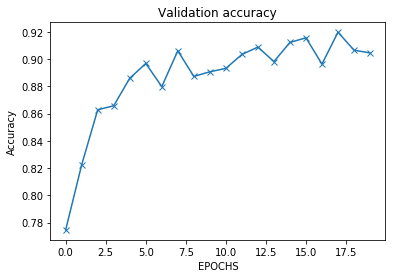

In [99]:
X_train_norm = rgb2gray(X_train)
X_valid_norm = rgb2gray(X_valid)

# print(X_train_norm.shape)

train_vali_network(X_train_norm, X_valid_norm, y_train, y_valid, gray = True)

### min_max_norm normalization

Training...

EPOCH 1 ...
Validation Accuracy = 0.694

EPOCH 2 ...
Validation Accuracy = 0.798

EPOCH 3 ...
Validation Accuracy = 0.830

EPOCH 4 ...
Validation Accuracy = 0.864

EPOCH 5 ...
Validation Accuracy = 0.873

EPOCH 6 ...
Validation Accuracy = 0.879

EPOCH 7 ...
Validation Accuracy = 0.879

EPOCH 8 ...
Validation Accuracy = 0.890

EPOCH 9 ...
Validation Accuracy = 0.895

EPOCH 10 ...
Validation Accuracy = 0.896

EPOCH 11 ...
Validation Accuracy = 0.904

EPOCH 12 ...
Validation Accuracy = 0.910

EPOCH 13 ...
Validation Accuracy = 0.904

EPOCH 14 ...
Validation Accuracy = 0.913

EPOCH 15 ...
Validation Accuracy = 0.911

EPOCH 16 ...
Validation Accuracy = 0.908

EPOCH 17 ...
Validation Accuracy = 0.909

EPOCH 18 ...
Validation Accuracy = 0.904

EPOCH 19 ...
Validation Accuracy = 0.912

EPOCH 20 ...
Validation Accuracy = 0.901



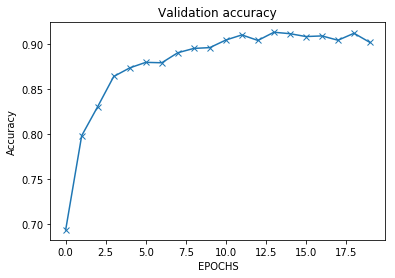

In [101]:
X_train_norm = min_max_norm(X_train)
X_valid_norm = min_max_norm(X_valid)

# print(X_train_norm.shape)

train_vali_network(X_train_norm, X_valid_norm, y_train, y_valid)

### -0.5 to 0.5 normalization

Training...

EPOCH 1 ...
Validation Accuracy = 0.323

EPOCH 2 ...
Validation Accuracy = 0.507

EPOCH 3 ...
Validation Accuracy = 0.615

EPOCH 4 ...
Validation Accuracy = 0.654

EPOCH 5 ...
Validation Accuracy = 0.663

EPOCH 6 ...
Validation Accuracy = 0.697

EPOCH 7 ...
Validation Accuracy = 0.698

EPOCH 8 ...
Validation Accuracy = 0.705

EPOCH 9 ...
Validation Accuracy = 0.704

EPOCH 10 ...
Validation Accuracy = 0.724

EPOCH 11 ...
Validation Accuracy = 0.717

EPOCH 12 ...
Validation Accuracy = 0.725

EPOCH 13 ...
Validation Accuracy = 0.718

EPOCH 14 ...
Validation Accuracy = 0.716

EPOCH 15 ...
Validation Accuracy = 0.748

EPOCH 16 ...
Validation Accuracy = 0.744

EPOCH 17 ...
Validation Accuracy = 0.724

EPOCH 18 ...
Validation Accuracy = 0.744

EPOCH 19 ...
Validation Accuracy = 0.741

EPOCH 20 ...
Validation Accuracy = 0.738



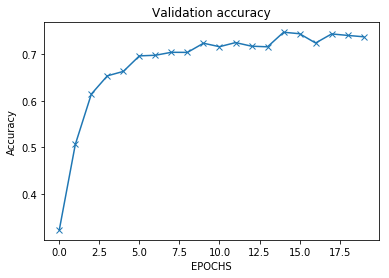

In [103]:
X_train_norm = simple_norm(X_train)
X_valid_norm = simple_norm(X_valid)

# print(X_train_norm.shape)

train_vali_network(X_train_norm, X_valid_norm, y_train, y_valid)

### zero mean 1 std normalization

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Training...

EPOCH 1 ...
Validation Accuracy = 0.849

EPOCH 2 ...
Validation Accuracy = 0.875

EPOCH 3 ...
Validation Accuracy = 0.898

EPOCH 4 ...
Validation Accuracy = 0.914

EPOCH 5 ...
Validation Accuracy = 0.903

EPOCH 6 ...
Validation Accuracy = 0.906

EPOCH 7 ...
Validation Accuracy = 0.906

EPOCH 8 ...
Validation Accuracy = 0.924

EPOCH 9 ...
Validation Accuracy = 0.924

EPOCH 10 ...
Validation Accuracy = 0.927

EPOCH 11 ...
Validation Accuracy = 0.921

EPOCH 12 ...
Validation Accuracy = 0.920

EPOCH 13 ...
Validation Accuracy = 0.933

EPOCH 14 ...
Validation Accuracy = 0.925

EPOCH 15 ...
Validation Accuracy = 0.939

EPOCH 16 ...
Validation Accuracy = 0.942

EPOCH 17 ...
Validation Accuracy = 0.938

EPOCH 18 ...
Validation Accuracy = 0.932

EPOCH 19 ...
Validation Accuracy = 0.943

EPOCH 2

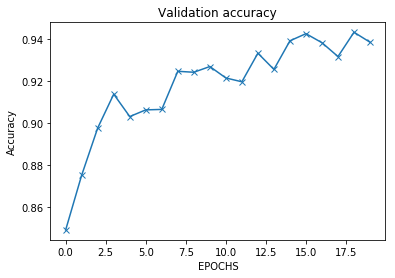

In [14]:
X_train_norm = zero_one_norm(X_train)
X_valid_norm = zero_one_norm(X_valid)

# print(X_train_norm.shape)


train_vali_network(X_train_norm, X_valid_norm, y_train, y_valid)


### weighted loss function for imbalanced dataset

median-frequency re-weighting https://blog.node.us.com/tensorflow-dealing-with-imbalanced-data-eb0108b10701
https://www.tensorflow.org/api_docs/python/tf/losses/softmax_cross_entropy

In [110]:
class_freq = np.asarray([train_dist[csv_data['SignName'][i]]/n_train for i in range(n_classes)])

alpha_class = np.median(class_freq)/class_freq


In [111]:
def train_vali_network_weighted(X_train_norm, X_valid_norm, y_train, y_valid, weights, gray = False):
    
    epsilon = tf.constant(value=1e-10)
    
    if gray:
        x = tf.placeholder(tf.float32, (None, 32, 32, 1))
    else:   
        x = tf.placeholder(tf.float32, (None, 32, 32, 3))
    y = tf.placeholder(tf.int32, (None))
    
    batch_weights = tf.placeholder(tf.float32, (None))
    
    one_hot_y = tf.one_hot(y, 43)
    

    logits = LeNet(x, gray = gray)
    
#     cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
#     softmax = tf.nn.softmax(logits)
#     cross_entropy = -tf.math.reduce_sum(tf.math.multiply(one_hot_y * tf.log(softmax + epsilon), weights), axis=1)
    
    loss_operation = tf.losses.softmax_cross_entropy(one_hot_y, logits, weights=batch_weights)/BATCH_SIZE
    
#     loss_operation = tf.reduce_mean(cross_entropy)
    optimizer = tf.train.AdamOptimizer(learning_rate = rate)
    training_operation = optimizer.minimize(loss_operation)


    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
    accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    saver = tf.train.Saver()

    def evaluate(X_data, y_data):
        num_examples = len(X_data)
        total_accuracy = 0
        sess = tf.get_default_session()
        for offset in range(0, num_examples, BATCH_SIZE):
            batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
            accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
            total_accuracy += (accuracy * len(batch_x))
        return total_accuracy / num_examples


    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        num_examples = n_train

        print("Training...")
        print()
        val_acc = []
        for i in range(EPOCHS):
            X_train_, y_train_ = shuffle(X_train_norm, y_train)

            for offset in range(0, num_examples, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = X_train_[offset:end], y_train_[offset:end]
                
                #### weights of each batch according to the labels
                batch_weights_ = weights[batch_y]
                
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, batch_weights:batch_weights_})

            validation_accuracy = evaluate(X_valid_norm, y_valid)
            print("EPOCH {} ...".format(i+1))
            print("Validation Accuracy = {:.3f}".format(validation_accuracy))
            print()
            val_acc.append(validation_accuracy)
    
    plt.figure()
    plt.plot(list(range(EPOCHS)), val_acc, 'x-')
    plt.xlabel('EPOCHS')
    plt.ylabel('Accuracy')
    plt.title('Validation accuracy')
#     plt.savefig('./output/weighted_loss_func.png')
    plt.show()


Training...

EPOCH 1 ...
Validation Accuracy = 0.814

EPOCH 2 ...
Validation Accuracy = 0.880

EPOCH 3 ...
Validation Accuracy = 0.892

EPOCH 4 ...
Validation Accuracy = 0.919

EPOCH 5 ...
Validation Accuracy = 0.921

EPOCH 6 ...
Validation Accuracy = 0.915

EPOCH 7 ...
Validation Accuracy = 0.921

EPOCH 8 ...
Validation Accuracy = 0.935

EPOCH 9 ...
Validation Accuracy = 0.933

EPOCH 10 ...
Validation Accuracy = 0.941

EPOCH 11 ...
Validation Accuracy = 0.932

EPOCH 12 ...
Validation Accuracy = 0.940

EPOCH 13 ...
Validation Accuracy = 0.942

EPOCH 14 ...
Validation Accuracy = 0.942

EPOCH 15 ...
Validation Accuracy = 0.940

EPOCH 16 ...
Validation Accuracy = 0.944

EPOCH 17 ...
Validation Accuracy = 0.926

EPOCH 18 ...
Validation Accuracy = 0.936

EPOCH 19 ...
Validation Accuracy = 0.886

EPOCH 20 ...
Validation Accuracy = 0.946



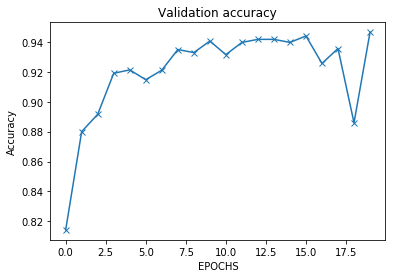

In [112]:
X_train_norm = zero_one_norm(X_train)
X_valid_norm = zero_one_norm(X_valid)

# print(X_train_norm.shape)


train_vali_network_weighted(X_train_norm, X_valid_norm, y_train, y_valid, weights=alpha_class)

### try to increase the sample numbers in small classes

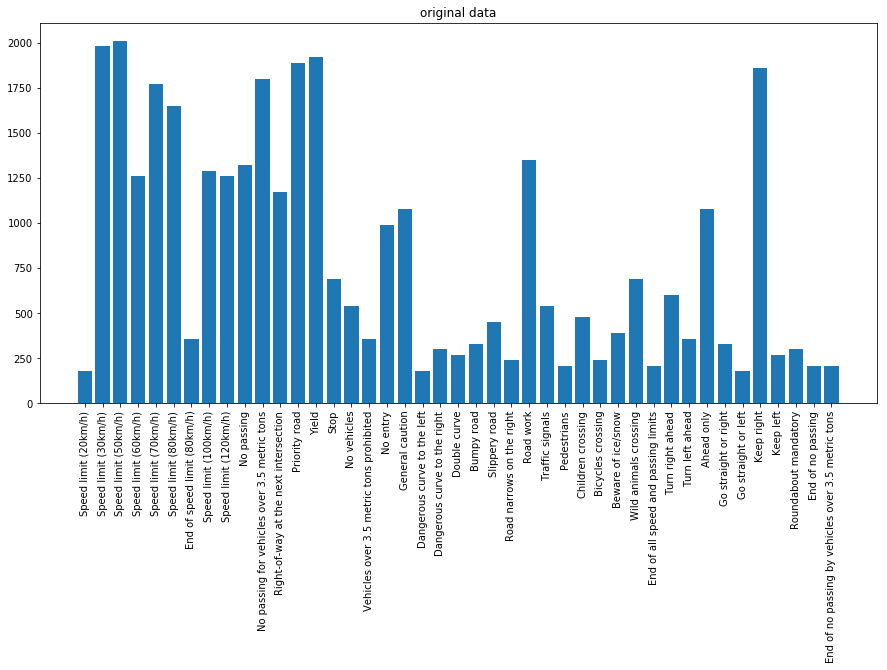

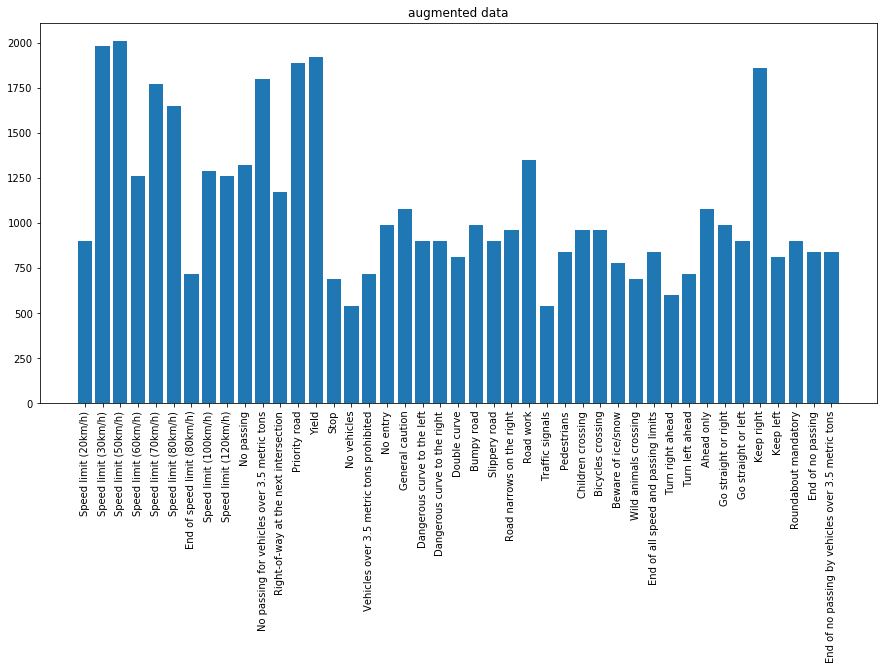

In [114]:
num_class = np.asarray([train_dist[csv_data['SignName'][i]] for i in range(n_classes)])
names_class = [csv_data['SignName'][i] for i in range(n_classes)]

plt.figure(figsize=(15,7))
plt.bar(list(range(n_classes)), num_class)
plt.xticks(list(range(n_classes)), names_class, rotation=90)
plt.title('original data')
# plt.savefig('./output/original_data_dist.png')


make_data = defaultdict()
make_data_y = defaultdict()

for i in range(n_classes):
    current_num = train_dist[csv_data['SignName'][i]]
    if current_num < 1000:
        make_data[csv_data['SignName'][i]] = np.tile(X_train[y_train == i,...], reps=(1000//current_num, 1,1,1))
        make_data_y[csv_data['SignName'][i]] = np.tile(y_train[y_train == i], reps=(1000//current_num))
    else:
        make_data[csv_data['SignName'][i]] = X_train[y_train == i,...]
        make_data_y[csv_data['SignName'][i]] = y_train[y_train == i]

aug_data = np.concatenate(tuple([make_data[csv_data['SignName'][i]] for i in range(n_classes)]),axis = 0)
aug_data_y = np.concatenate(tuple([make_data_y[csv_data['SignName'][i]] for i in range(n_classes)]),axis = 0)


aug_data_num_cls = defaultdict()

for i in range(n_classes):
    aug_data_num_cls[csv_data['SignName'][i]] = np.sum(aug_data_y == i)

aug_num_class = [aug_data_num_cls[csv_data['SignName'][i]] for i in range(n_classes)]


plt.figure(figsize=(15,7))
plt.bar(list(range(n_classes)), aug_num_class)
plt.xticks(list(range(n_classes)), names_class, rotation=90)
# plt.savefig('./output/augmented_data_dist.png')
plt.title('augmented data')




Training...

EPOCH 1 ...
Validation Accuracy = 0.859

EPOCH 2 ...
Validation Accuracy = 0.902

EPOCH 3 ...
Validation Accuracy = 0.915

EPOCH 4 ...
Validation Accuracy = 0.909

EPOCH 5 ...
Validation Accuracy = 0.927

EPOCH 6 ...
Validation Accuracy = 0.929

EPOCH 7 ...
Validation Accuracy = 0.924

EPOCH 8 ...
Validation Accuracy = 0.918

EPOCH 9 ...
Validation Accuracy = 0.938

EPOCH 10 ...
Validation Accuracy = 0.944

EPOCH 11 ...
Validation Accuracy = 0.923

EPOCH 12 ...
Validation Accuracy = 0.937

EPOCH 13 ...
Validation Accuracy = 0.933

EPOCH 14 ...
Validation Accuracy = 0.938

EPOCH 15 ...
Validation Accuracy = 0.930

EPOCH 16 ...
Validation Accuracy = 0.931

EPOCH 17 ...
Validation Accuracy = 0.950

EPOCH 18 ...
Validation Accuracy = 0.922

EPOCH 19 ...
Validation Accuracy = 0.937

EPOCH 20 ...
Validation Accuracy = 0.930

Model saved


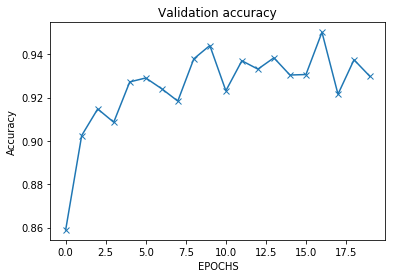

In [116]:
X_train_norm = zero_one_norm(aug_data)
X_valid_norm = zero_one_norm(X_valid)

# print(X_train_norm.shape)


train_vali_network(X_train_norm, X_valid_norm, aug_data_y, y_valid)

### saved model according to the validation dataset

In [18]:
from sklearn.utils import shuffle

rate = 0.001
EPOCHS = 20
BATCH_SIZE = 128


x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)


logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)


correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    
    predicted_y = []
    
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy, logits_ = sess.run([accuracy_operation, logits], feed_dict={x: batch_x, y: batch_y})
        predicted_y.append(np.argmax(logits_,axis=1))
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples, predicted_y


In [23]:
#### train and validation

X_train_norm = zero_one_norm(X_train)
X_valid_norm = zero_one_norm(X_valid)


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = n_train

    print("Training...")
    print()
    val_acc = []
    for i in range(EPOCHS):
        X_train_, y_train_ = shuffle(X_train_norm, y_train)

        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_[offset:end], y_train_[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})

        validation_accuracy,_ = evaluate(X_valid_norm, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        val_acc.append(validation_accuracy)

    saver.save(sess, './lenet_model/lenet')
    print("Model saved")


#         new_graph = tf.Graph()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
#     saver = tf.train.import_meta_graph('./lenet_model/lenet.meta')
    saver.restore(sess, tf.train.latest_checkpoint('./lenet_model/'))

    validation_accuracy,_ = evaluate(X_valid_norm, y_valid)

    print("Validation Accuracy = {:.3f}".format(validation_accuracy))


Training...

EPOCH 1 ...
Validation Accuracy = 0.850

EPOCH 2 ...
Validation Accuracy = 0.880

EPOCH 3 ...
Validation Accuracy = 0.900

EPOCH 4 ...
Validation Accuracy = 0.909

EPOCH 5 ...
Validation Accuracy = 0.916

EPOCH 6 ...
Validation Accuracy = 0.919

EPOCH 7 ...
Validation Accuracy = 0.916

EPOCH 8 ...
Validation Accuracy = 0.919

EPOCH 9 ...
Validation Accuracy = 0.917

EPOCH 10 ...
Validation Accuracy = 0.927

EPOCH 11 ...
Validation Accuracy = 0.931

EPOCH 12 ...
Validation Accuracy = 0.929

EPOCH 13 ...
Validation Accuracy = 0.925

EPOCH 14 ...
Validation Accuracy = 0.929

EPOCH 15 ...
Validation Accuracy = 0.928

EPOCH 16 ...
Validation Accuracy = 0.926

EPOCH 17 ...
Validation Accuracy = 0.935

EPOCH 18 ...
Validation Accuracy = 0.923

EPOCH 19 ...
Validation Accuracy = 0.941

EPOCH 20 ...
Validation Accuracy = 0.937

Model saved
INFO:tensorflow:Restoring parameters from ./lenet_model/lenet
Validation Accuracy = 0.937


### performance on test image
https://github.com/wcipriano/pretty-print-confusion-matrix

In [66]:
from pandas import DataFrame

import matplotlib.font_manager as fm
from matplotlib.collections import QuadMesh
import seaborn as sn


def get_new_fig(fn, figsize=[9,9]):
    """ Init graphics """
    fig1 = plt.figure(fn, figsize)
    ax1 = fig1.gca()   #Get Current Axis
    ax1.cla() # clear existing plot
    return fig1, ax1
#

def configcell_text_and_colors(array_df, lin, col, oText, facecolors, posi, fz, fmt, show_null_values=0):
    """
      config cell text and colors
      and return text elements to add and to dell
      @TODO: use fmt
    """
    text_add = []; text_del = [];
    cell_val = array_df[lin][col]
    tot_all = array_df[-1][-1]
    per = (float(cell_val) / tot_all) * 100
    curr_column = array_df[:,col]
    ccl = len(curr_column)

    #last line  and/or last column
    if(col == (ccl - 1)) or (lin == (ccl - 1)):
        #tots and percents
        if(cell_val != 0):
            if(col == ccl - 1) and (lin == ccl - 1):
                tot_rig = 0
                for i in range(array_df.shape[0] - 1):
                    tot_rig += array_df[i][i]
                per_ok = (float(tot_rig) / cell_val) * 100
            elif(col == ccl - 1):
                tot_rig = array_df[lin][lin]
                per_ok = (float(tot_rig) / cell_val) * 100
            elif(lin == ccl - 1):
                tot_rig = array_df[col][col]
                per_ok = (float(tot_rig) / cell_val) * 100
            per_err = 100 - per_ok
        else:
            per_ok = per_err = 0

        per_ok_s = ['%.2f%%'%(per_ok), '100%'] [per_ok == 100]

        #text to DEL
        text_del.append(oText)

        #text to ADD
        font_prop = fm.FontProperties(weight='bold', size=fz)
        text_kwargs = dict(color='w', ha="center", va="center", gid='sum', fontproperties=font_prop)
        lis_txt = ['%d'%(cell_val), per_ok_s, '%.2f%%'%(per_err)]
        lis_kwa = [text_kwargs]
        dic = text_kwargs.copy(); dic['color'] = 'w'; lis_kwa.append(dic);
        dic = text_kwargs.copy(); dic['color'] = 'r'; lis_kwa.append(dic);
        lis_pos = [(oText._x, oText._y-0.3), (oText._x, oText._y), (oText._x, oText._y+0.3)]
        for i in range(len(lis_txt)):
            newText = dict(x=lis_pos[i][0], y=lis_pos[i][1], text=lis_txt[i], kw=lis_kwa[i])
            #print 'lin: %s, col: %s, newText: %s' %(lin, col, newText)
            text_add.append(newText)
        #print '\n'

        #set background color for sum cells (last line and last column)
        carr = [0.27, 0.30, 0.27, 1.0]
        if(col == ccl - 1) and (lin == ccl - 1):
            carr = [0.17, 0.20, 0.17, 1.0]
        facecolors[posi] = carr

    else:
        if(per > 0):
            txt = '%s\n%.2f%%' %(cell_val, per)
        else:
            if(show_null_values == 0):
                txt = ''
            elif(show_null_values == 1):
                txt = '0'
            else:
                txt = '0\n0.0%'
        oText.set_text(txt)

        #main diagonal
        if(col == lin):
            #set color of the textin the diagonal to white
            oText.set_color('w')
            # set background color in the diagonal to blue
            facecolors[posi] = [0.35, 0.8, 0.55, 1.0]
        else:
            oText.set_color('r')

    return text_add, text_del
#

def insert_totals(df_cm):
    """ insert total column and line (the last ones) """
    sum_col = []
    for c in df_cm.columns:
        sum_col.append( df_cm[c].sum() )
    sum_lin = []
    for item_line in df_cm.iterrows():
        sum_lin.append( item_line[1].sum() )
    df_cm['sum_lin'] = sum_lin
    sum_col.append(np.sum(sum_lin))
    df_cm.loc['sum_col'] = sum_col
    #print ('\ndf_cm:\n', df_cm, '\n\b\n')
#

def pretty_plot_confusion_matrix(df_cm, annot=True, cmap="Oranges", fmt='.2f', fz=11,
      lw=0.5, cbar=False, figsize=[8,8], show_null_values=0, pred_val_axis='y'):
    """
      print conf matrix with default layout (like matlab)
      params:
        df_cm          dataframe (pandas) without totals
        annot          print text in each cell
        cmap           Oranges,Oranges_r,YlGnBu,Blues,RdBu, ... see:
        fz             fontsize
        lw             linewidth
        pred_val_axis  where to show the prediction values (x or y axis)
                        'col' or 'x': show predicted values in columns (x axis) instead lines
                        'lin' or 'y': show predicted values in lines   (y axis)
    """
    if(pred_val_axis in ('col', 'x')):
        xlbl = 'Predicted'
        ylbl = 'Actual'
    else:
        xlbl = 'Actual'
        ylbl = 'Predicted'
        df_cm = df_cm.T

    # create "Total" column
    insert_totals(df_cm)

    #this is for print allways in the same window
    fig, ax1 = get_new_fig('Conf matrix default', figsize)

    #thanks for seaborn
    ax = sn.heatmap(df_cm, annot=annot, annot_kws={"size": fz}, linewidths=lw, ax=ax1,
                    cbar=cbar, cmap=cmap, linecolor='w', fmt=fmt)

    #set ticklabels rotation
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, fontsize = 10)
    ax.set_yticklabels(ax.get_yticklabels(), rotation = 25, fontsize = 10)

    # Turn off all the ticks
    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False

    #face colors list
    quadmesh = ax.findobj(QuadMesh)[0]
    facecolors = quadmesh.get_facecolors()

    #iter in text elements
    array_df = np.array( df_cm.to_records(index=False).tolist() )
    text_add = []; text_del = [];
    posi = -1 #from left to right, bottom to top.
    for t in ax.collections[0].axes.texts: #ax.texts:
        pos = np.array( t.get_position()) - [0.5,0.5]
        lin = int(pos[1]); col = int(pos[0]);
        posi += 1
        #print ('>>> pos: %s, posi: %s, val: %s, txt: %s' %(pos, posi, array_df[lin][col], t.get_text()))

        #set text
        txt_res = configcell_text_and_colors(array_df, lin, col, t, facecolors, posi, fz, fmt, show_null_values)

        text_add.extend(txt_res[0])
        text_del.extend(txt_res[1])

    #remove the old ones
    for item in text_del:
        item.remove()
    #append the new ones
    for item in text_add:
        ax.text(item['x'], item['y'], item['text'], **item['kw'])

    #titles and legends
    ax.set_title('Confusion matrix')
    ax.set_xlabel(xlbl)
    ax.set_ylabel(ylbl)
    plt.tight_layout()  #set layout slim
#     plt.savefig('./output/confus_mtx_test.png')
    plt.savefig('./output/sinnet_confus_mtx_test.png')
    plt.show()
#



(12630, 32, 32, 3)
INFO:tensorflow:Restoring parameters from ./lenet_model/lenet
Test Accuracy = 0.928
(12630,)
[[ 40   2   0 ...   0   0   0]
 [  0 696  10 ...   0   0   0]
 [  0   6 734 ...   0   0   0]
 ...
 [  0   0   1 ...  68   0   0]
 [  0   0   0 ...   0  42   0]
 [  0   0   0 ...   0  15  71]]


/home/kang/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel_launcher.py:48: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


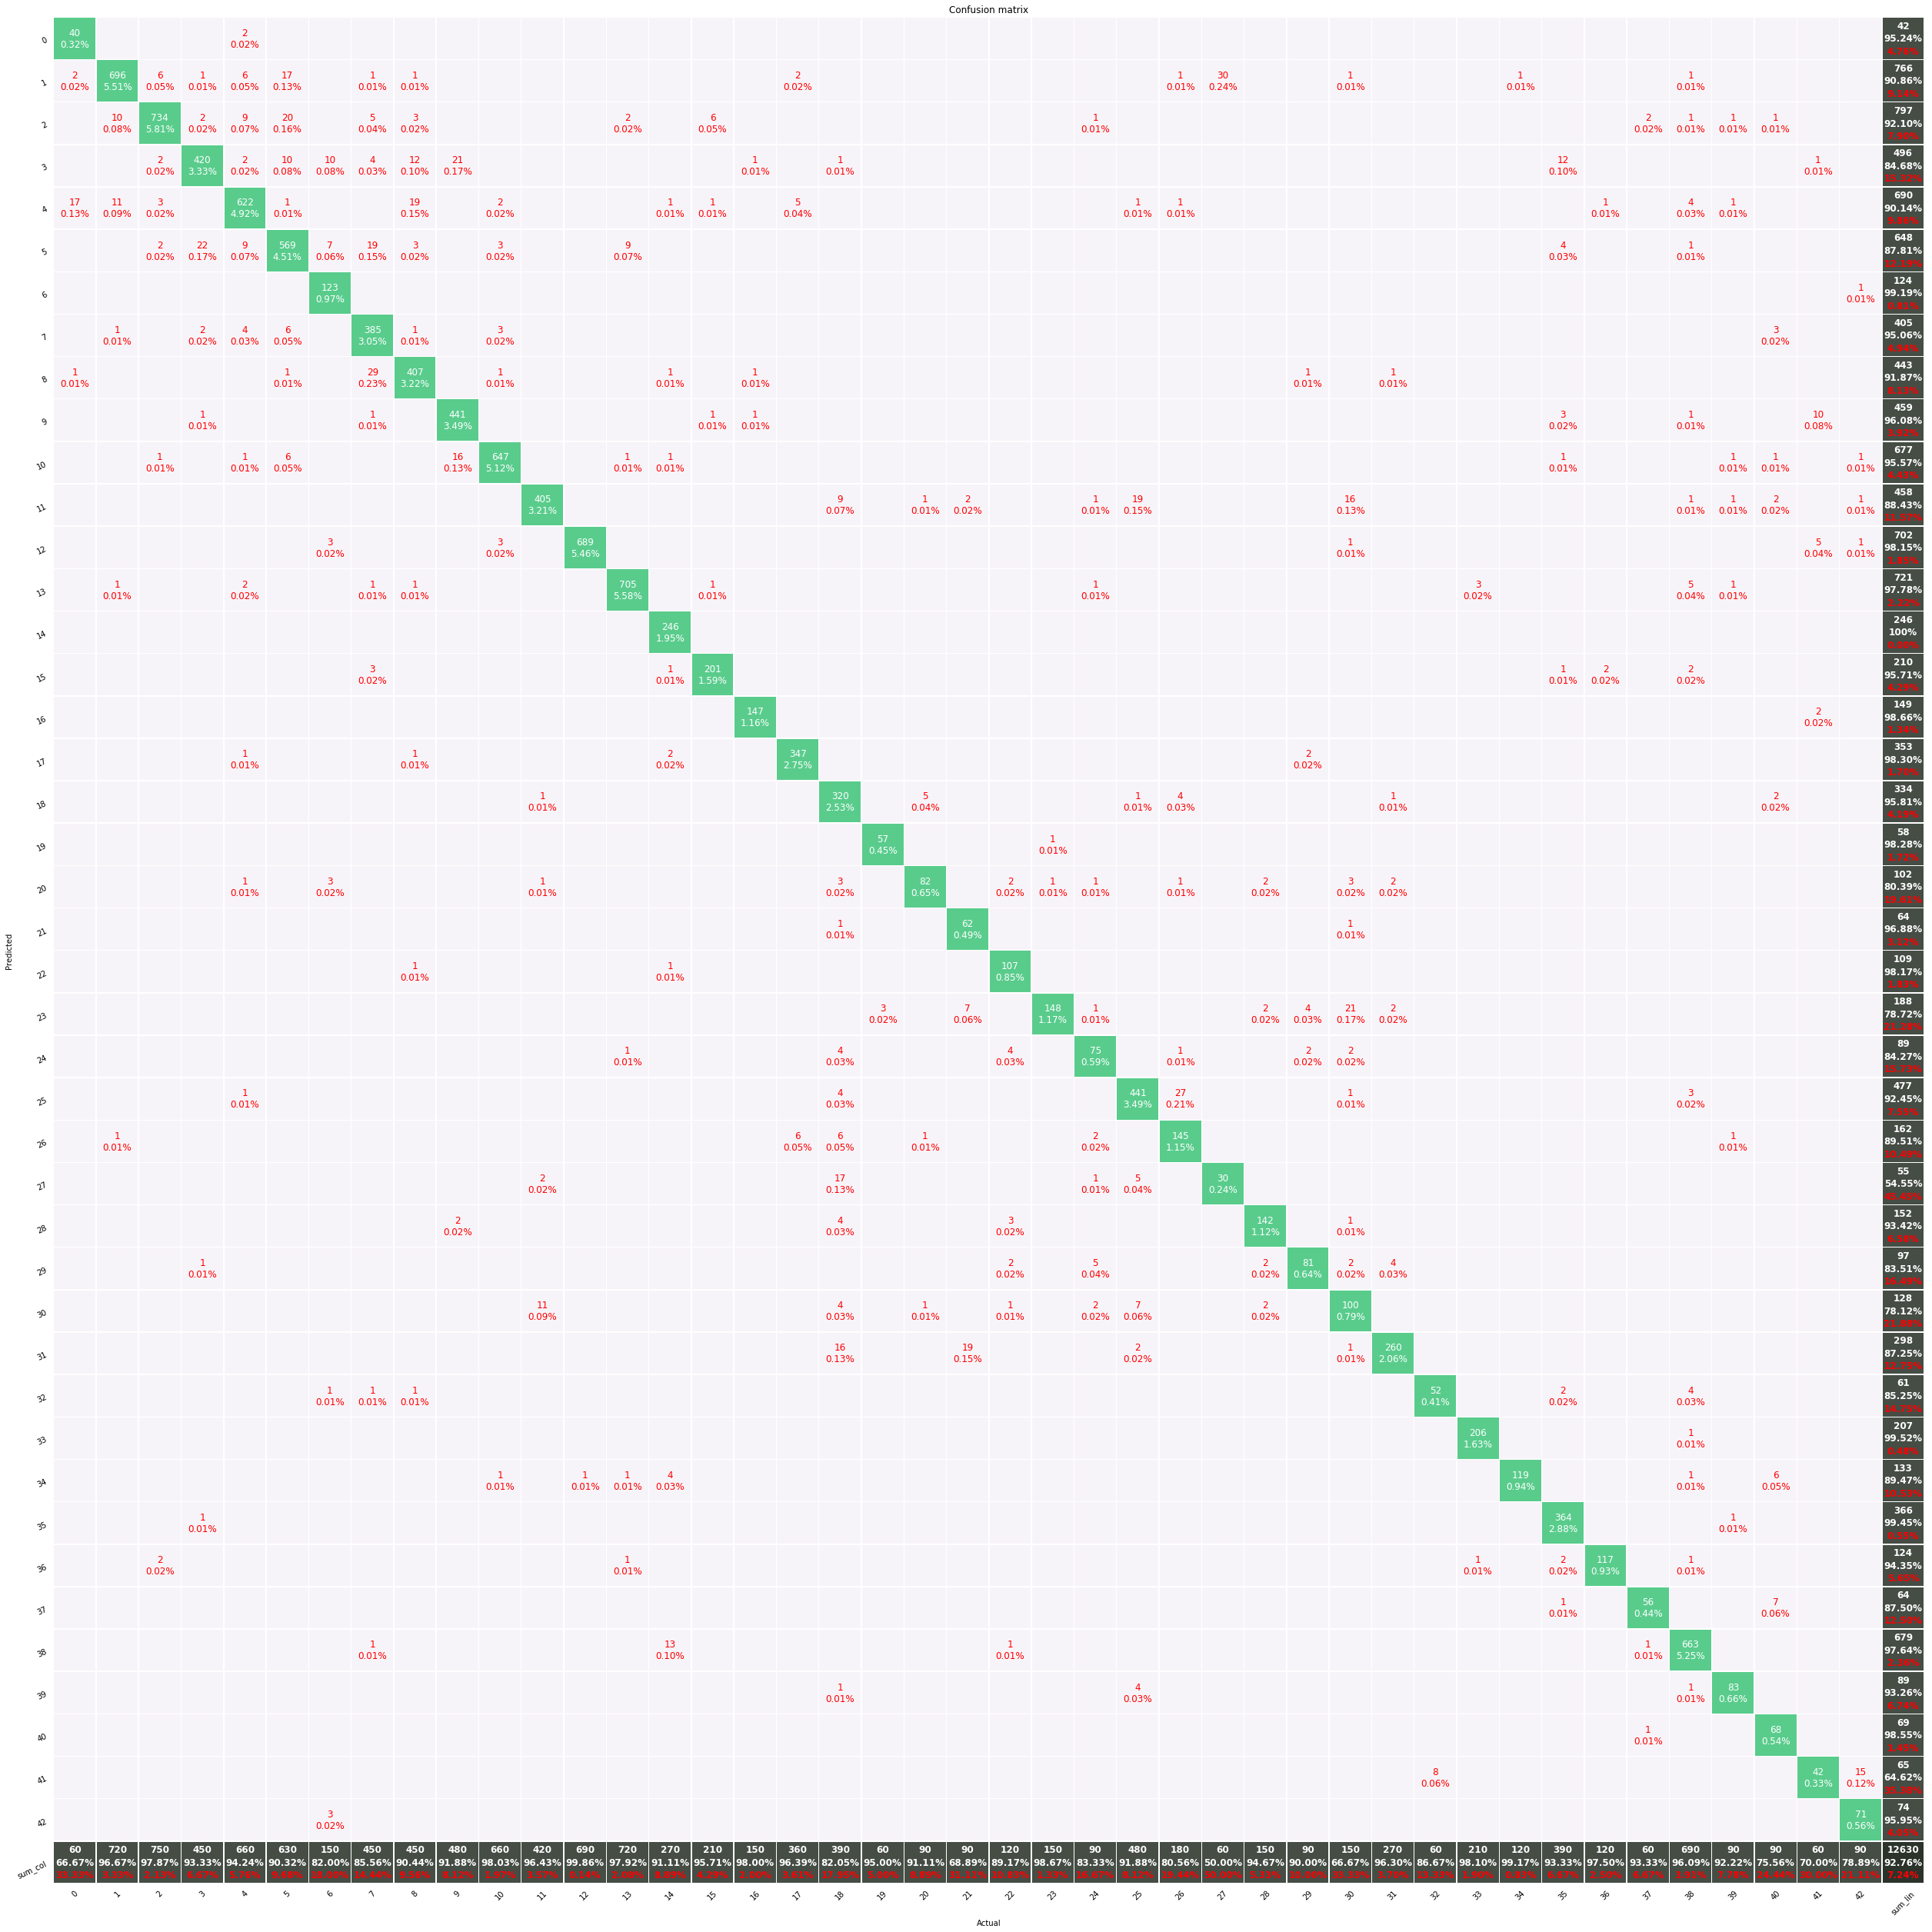

In [41]:
#### test
from sklearn.metrics import confusion_matrix

X_test_norm = zero_one_norm(X_test)

print(X_test_norm.shape)


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    saver.restore(sess, tf.train.latest_checkpoint('./lenet_model/'))

    test_accuracy, predicted_y = evaluate(X_test_norm, y_test)
    
    predicted_y = np.concatenate(tuple(predicted_y), axis=0)
    
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    print(predicted_y.shape)

    
confuse_array = confusion_matrix(y_test, predicted_y)

print(confuse_array)


df_cm = DataFrame(confuse_array, index=range(n_classes), columns=range(n_classes))
#colormap: see this and choose your more dear
cmap = 'PuRd'

pretty_plot_confusion_matrix(df_cm, cmap=cmap, fz=12, figsize=[35,35])
    


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

['./test_images/uk-traffic-sign-for-a-bend-to-the-left-england-uk-MBPXM6.jpg', './test_images/75874522-german-traffic-sign.jpg', './test_images/100_1607.jpg', './test_images/64914157-german-road-sign-slippery-road.jpg', './test_images/road-sign-no-parking-germany-europe-HY5MCB.jpg']


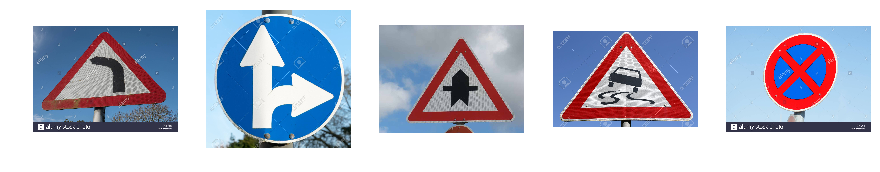

In [57]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

from glob import glob
import cv2

img_pths = glob('./test_images/*.jpg')

print(img_pths)


plt.figure(figsize=(15,5))
gs1 = gridspec.GridSpec(1,5)

for idx, img_pth in enumerate(img_pths):
    
    img = cv2.imread(img_pth)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    
    ax = plt.subplot(gs1[idx])
    ax.set_axis_off()
    ax.imshow(img)
#     ax.set_title(key)
# plt.savefig('./output/downloaded_test_imgs.png')
plt.show()






### Predict the Sign Type for Each Image

INFO:tensorflow:Restoring parameters from ./lenet_model/lenet
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)


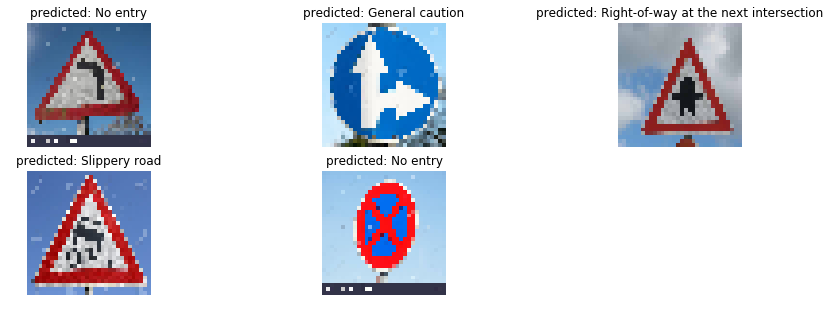

In [61]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

plt.figure(figsize=(15,5))
gs1 = gridspec.GridSpec(2,3)


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    saver.restore(sess, tf.train.latest_checkpoint('./lenet_model/'))
    
    predicted_idx = []
    
    for idx, img_pth in enumerate(img_pths):

        img = cv2.imread(img_pth)
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        img = cv2.resize(img, (32,32))
        img_ = np.expand_dims(img, axis=0)

        img_norm = zero_one_norm(img_)

        print(img.shape)
        
        logits_ = sess.run(logits, feed_dict={x: img_norm, y: np.array([0])})
        
        
        i = np.argmax(logits_)
        predicted_idx.append(i)
        
        ax = plt.subplot(gs1[idx])
        ax.set_axis_off()
        ax.imshow(img)
        ax.set_title('predicted: ' + csv_data['SignName'][i])
    
    plt.savefig('./output/prediction_test_image.png')
    
    





### Analyze Performance

In [62]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

print('accuracy: ', 2/5)


accuracy:  0.4


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

INFO:tensorflow:Restoring parameters from ./lenet_model/lenet
(32, 32, 3)
[17 29 26  1 18]
(32, 32, 3)
[18 36 26 38 11]
(32, 32, 3)
[11 19 27 21 30]
(32, 32, 3)
[23 11 30 25  2]
(32, 32, 3)
[17 29 26  3 30]


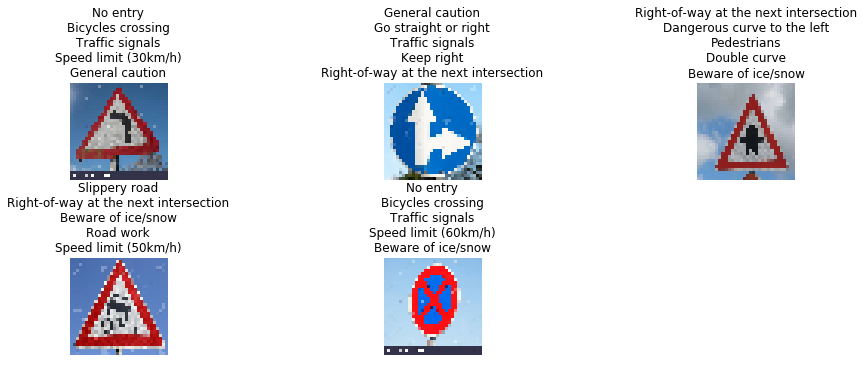

In [77]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

plt.figure(figsize=(15,5))
gs1 = gridspec.GridSpec(2,3)
gs1.update(hspace= 0.8, wspace=0.5) # set the spacing between axes. 


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    saver.restore(sess, tf.train.latest_checkpoint('./lenet_model/'))
    
    predicted_idx = []
    
    split_ = '\n'
    
    for idx, img_pth in enumerate(img_pths):

        img = cv2.imread(img_pth)
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        img = cv2.resize(img, (32,32))
        img_ = np.expand_dims(img, axis=0)

        img_norm = zero_one_norm(img_)

        print(img.shape)
        
        _, top_k_idx = sess.run(tf.nn.top_k(logits,k=5), feed_dict={x: img_norm, y: np.array([0])})
        
        print(np.squeeze(top_k_idx))
        
#         print(split_.join([csv_data['SignName'][i] for i in np.squeeze(top_k_idx)]))
                    
        ax = plt.subplot(gs1[idx])
        ax.set_axis_off()
        ax.imshow(img)
        ax.set_title(split_.join([csv_data['SignName'][i] for i in np.squeeze(top_k_idx)]))
    
#     plt.savefig('./output/prediction_test_image_top5.png')
    



### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [107]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,5))
    for featuremap in range(featuremaps):
        plt.subplot(1,6, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")
    plt.tight_layout()
    plt.savefig('./output/feature_maps.png')

In [108]:
def LeNet(x, gray=False):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    if gray:
        x = tf.nn.conv2d(x, filter=tf.Variable(tf.truncated_normal((5,5,1,6),mean=mu,stddev=sigma)),strides=[1,1,1,1],
                     padding='VALID')
    else:
        # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
        x = tf.nn.conv2d(x, filter=tf.Variable(tf.truncated_normal((5,5,3,6),mean=mu,stddev=sigma)),strides=[1,1,1,1],
                     padding='VALID')
    x = tf.nn.bias_add(x, tf.Variable(tf.zeros(6)))
    # TODO: Activation.
    x_1 = tf.nn.relu(x)
    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    x = tf.nn.max_pool(x_1, ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    x = tf.nn.conv2d(x, filter=tf.Variable(tf.truncated_normal((5,5,6,16),mean=mu,stddev=sigma)),strides=[1,1,1,1],
                   padding='VALID')
    x = tf.nn.bias_add(x, tf.Variable(tf.zeros(16)))
    # TODO: Activation.
    x_2 = tf.nn.relu(x)
    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    x = tf.nn.max_pool(x_2, ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')
    # TODO: Flatten. Input = 5x5x16. Output = 400.
    x = flatten(x)
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    x = tf.matmul(x, tf.Variable(tf.truncated_normal((400,120),mean=mu,stddev=sigma))) + tf.Variable(tf.zeros((120)))
    # TODO: Activation.
    x = tf.nn.relu(x)
    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    x = tf.matmul(x, tf.Variable(tf.truncated_normal((120,84),mean=mu,stddev=sigma))) + tf.Variable(tf.zeros((84)))
    # TODO: Activation.
    x = tf.nn.relu(x)
    # TODO: Layer 5: Fully Connected. Input = 84. Output = 10.
    logits = tf.matmul(x, tf.Variable(tf.truncated_normal((84,43),mean=mu,stddev=sigma))) + tf.Variable(tf.zeros((43)))
    return logits, x_1, x_2


INFO:tensorflow:Restoring parameters from ./lenet_model/lenet


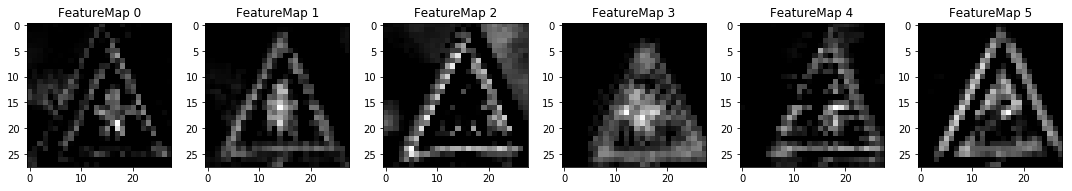

In [109]:

img_pth = './test_images/100_1607.jpg'

img = cv2.imread(img_pth)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
img = cv2.resize(img, (32,32))
img_ = np.expand_dims(img, axis=0)
img_norm = zero_one_norm(img_)

logits, x_1, x_2 = LeNet(x)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    saver.restore(sess, tf.train.latest_checkpoint('./lenet_model/'))
    
#     print([n.name for n in tf.get_default_graph().as_graph_def().node])
    
    outputFeatureMap(img_norm, x_1, activation_min=-1, activation_max=-1 ,plt_num=1)
    
#     outputFeatureMap(img_norm, x_2, activation_min=-1, activation_max=-1 ,plt_num=1)
    

### change network architecture 
inspired from https://chatbotslife.com/german-sign-classification-using-deep-learning-neural-networks-98-8-solution-d05656bf51ad

In [57]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten


def SinNet(x, p):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    x = tf.nn.conv2d(x, filter=tf.Variable(tf.truncated_normal((1,1,3,3),mean=mu,stddev=sigma)),strides=[1,1,1,1],
                     padding='SAME')
    x = tf.nn.bias_add(x, tf.Variable(tf.zeros(3)))

    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x32
    x = tf.nn.conv2d(x, filter=tf.Variable(tf.truncated_normal((3,3,3,32),mean=mu,stddev=sigma)),strides=[1,1,1,1],
                     padding='VALID')
    x = tf.nn.bias_add(x, tf.Variable(tf.zeros(32)))
    x = tf.nn.relu(x)
    
    x = tf.nn.conv2d(x, filter=tf.Variable(tf.truncated_normal((3,3,32,32),mean=mu,stddev=sigma)),strides=[1,1,1,1],
                     padding='VALID')
    
    x = tf.nn.bias_add(x, tf.Variable(tf.zeros(32)))
    # TODO: Activation.
    x= tf.nn.relu(x)
    
    # TODO: Pooling. Input = 28x28x32. Output = 14x14x32.
    x = tf.nn.max_pool(x, ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')
    x = tf.nn.dropout(x, keep_prob=p)
    
    x_1 = flatten(x)
    x_1 = tf.matmul(x_1, tf.Variable(tf.truncated_normal((6272,128),mean=mu,stddev=sigma))) + tf.Variable(tf.zeros((128)))
    
    # TODO: Layer 2: Convolutional. Output = 12x12x64.
    x = tf.nn.conv2d(x, filter=tf.Variable(tf.truncated_normal((3,3,32,64),mean=mu,stddev=sigma)),strides=[1,1,1,1],
                   padding='VALID')
    
    x = tf.nn.bias_add(x, tf.Variable(tf.zeros(64)))
    # TODO: Activation.
    x = tf.nn.relu(x)
    # TODO: Pooling. Input = 12x12x64. Output = 6x6x64.
    x = tf.nn.max_pool(x, ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')
    x = tf.nn.dropout(x, keep_prob=p)
    
    x_2 = flatten(x)
    x_2 = tf.matmul(x_2, tf.Variable(tf.truncated_normal((2304,128),mean=mu,stddev=sigma))) + tf.Variable(tf.zeros((128)))
    
    # layer 3 output 4x4x128
    x = tf.nn.conv2d(x, filter=tf.Variable(tf.truncated_normal((3,3,64,128),mean=mu,stddev=sigma)),strides=[1,1,1,1],
                   padding='VALID')
    x = tf.nn.bias_add(x, tf.Variable(tf.zeros(128)))
    x = tf.nn.relu(x)
    x = tf.nn.dropout(x, keep_prob=p)
    
    x_3 = flatten(x)
    x_3 = tf.matmul(x_3, tf.Variable(tf.truncated_normal((2048,128),mean=mu,stddev=sigma))) + tf.Variable(tf.zeros((128)))
    
    x = tf.concat([x_1, x_2, x_3], axis=1)
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    x = tf.matmul(x, tf.Variable(tf.truncated_normal((384,256),mean=mu,stddev=sigma))) + tf.Variable(tf.zeros((256)))
#     x = tf.matmul(x, tf.Variable(tf.truncated_normal((10624,1024),mean=mu,stddev=sigma))) + tf.Variable(tf.zeros((1024)))
    # TODO: Activation.
    x = tf.nn.relu(x)
    x = tf.nn.dropout(x, keep_prob=p)
    
    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    x = tf.matmul(x, tf.Variable(tf.truncated_normal((256,128),mean=mu,stddev=sigma))) + tf.Variable(tf.zeros((128)))
#     x = tf.matmul(x, tf.Variable(tf.truncated_normal((1024,256),mean=mu,stddev=sigma))) + tf.Variable(tf.zeros((256)))
    # TODO: Activation.
    x = tf.nn.relu(x)
    x = tf.nn.dropout(x, keep_prob=p)
    
    # TODO: Layer 5: Fully Connected. Input = 84. Output = 10.
    logits = tf.matmul(x, tf.Variable(tf.truncated_normal((128,43),mean=mu,stddev=sigma))) + tf.Variable(tf.zeros((43)))
#     logits = tf.matmul(x, tf.Variable(tf.truncated_normal((256,43),mean=mu,stddev=sigma))) + tf.Variable(tf.zeros((43)))
    return logits

In [58]:
from sklearn.utils import shuffle

rate = 0.001
EPOCHS = 30
BATCH_SIZE = 128


x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
p = tf.placeholder(tf.float32, (None))

# batch_weights = tf.placeholder(tf.float32, (None))

logits = SinNet(x, p)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)

# loss_operation = tf.losses.softmax_cross_entropy(one_hot_y, logits, weights=batch_weights)/BATCH_SIZE

optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)


correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    
    predicted_y = []
    
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy, logits_ = sess.run([accuracy_operation, logits], feed_dict={x: batch_x, y: batch_y, p:np.array([1.0])})
        predicted_y.append(np.argmax(logits_,axis=1))
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples, predicted_y

Training...

EPOCH 1 ...
Validation Accuracy = 0.694

EPOCH 2 ...
Validation Accuracy = 0.914

EPOCH 3 ...
Validation Accuracy = 0.950

EPOCH 4 ...
Validation Accuracy = 0.961

EPOCH 5 ...
Validation Accuracy = 0.968

EPOCH 6 ...
Validation Accuracy = 0.974

EPOCH 7 ...
Validation Accuracy = 0.967

EPOCH 8 ...
Validation Accuracy = 0.975

EPOCH 9 ...
Validation Accuracy = 0.979

EPOCH 10 ...
Validation Accuracy = 0.977

EPOCH 11 ...
Validation Accuracy = 0.977

EPOCH 12 ...
Validation Accuracy = 0.980

EPOCH 13 ...
Validation Accuracy = 0.978

EPOCH 14 ...
Validation Accuracy = 0.973

EPOCH 15 ...
Validation Accuracy = 0.978

EPOCH 16 ...
Validation Accuracy = 0.977

EPOCH 17 ...
Validation Accuracy = 0.975

EPOCH 18 ...
Validation Accuracy = 0.982

EPOCH 19 ...
Validation Accuracy = 0.984

EPOCH 20 ...
Validation Accuracy = 0.979

EPOCH 21 ...
Validation Accuracy = 0.984

EPOCH 22 ...
Validation Accuracy = 0.982

EPOCH 23 ...
Validation Accuracy = 0.985

EPOCH 24 ...
Validation Accura

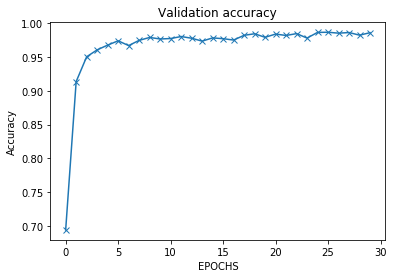

In [61]:
X_train_norm = zero_one_norm(X_train)
X_valid_norm = zero_one_norm(X_valid)


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = n_train

    print("Training...")
    print()
    val_acc = []
    for i in range(EPOCHS):
        X_train_, y_train_ = shuffle(X_train_norm, y_train)

        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_[offset:end], y_train_[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, p:np.array([0.5])})

        validation_accuracy,_ = evaluate(X_valid_norm, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        val_acc.append(validation_accuracy)
    
    plt.figure()
    plt.plot(list(range(EPOCHS)), val_acc, 'x-')
    plt.xlabel('EPOCHS')
    plt.ylabel('Accuracy')
    plt.title('Validation accuracy')
    plt.savefig('./output/sinnet_validation.png')
    
    saver.save(sess, './sinnet_model/sinnet')
    print("Model saved")


In [62]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
#     saver = tf.train.import_meta_graph('./lenet_model/lenet.meta')
    saver.restore(sess, tf.train.latest_checkpoint('./sinnet_model/'))

    validation_accuracy,_ = evaluate(X_valid_norm, y_valid)

    print("Validation Accuracy = {:.3f}".format(validation_accuracy))

INFO:tensorflow:Restoring parameters from ./sinnet_model/sinnet
Validation Accuracy = 0.986


(12630, 32, 32, 3)
INFO:tensorflow:Restoring parameters from ./sinnet_model/sinnet
Test Accuracy = 0.972
(12630,)
[[ 57   0   0 ...   0   0   0]
 [  0 712   1 ...   2   0   0]
 [  0   1 749 ...   0   0   0]
 ...
 [  0   1   0 ...  80   0   0]
 [  0   0   0 ...   0  50   0]
 [  0   0   0 ...   0   4  86]]


/home/kang/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel_launcher.py:48: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


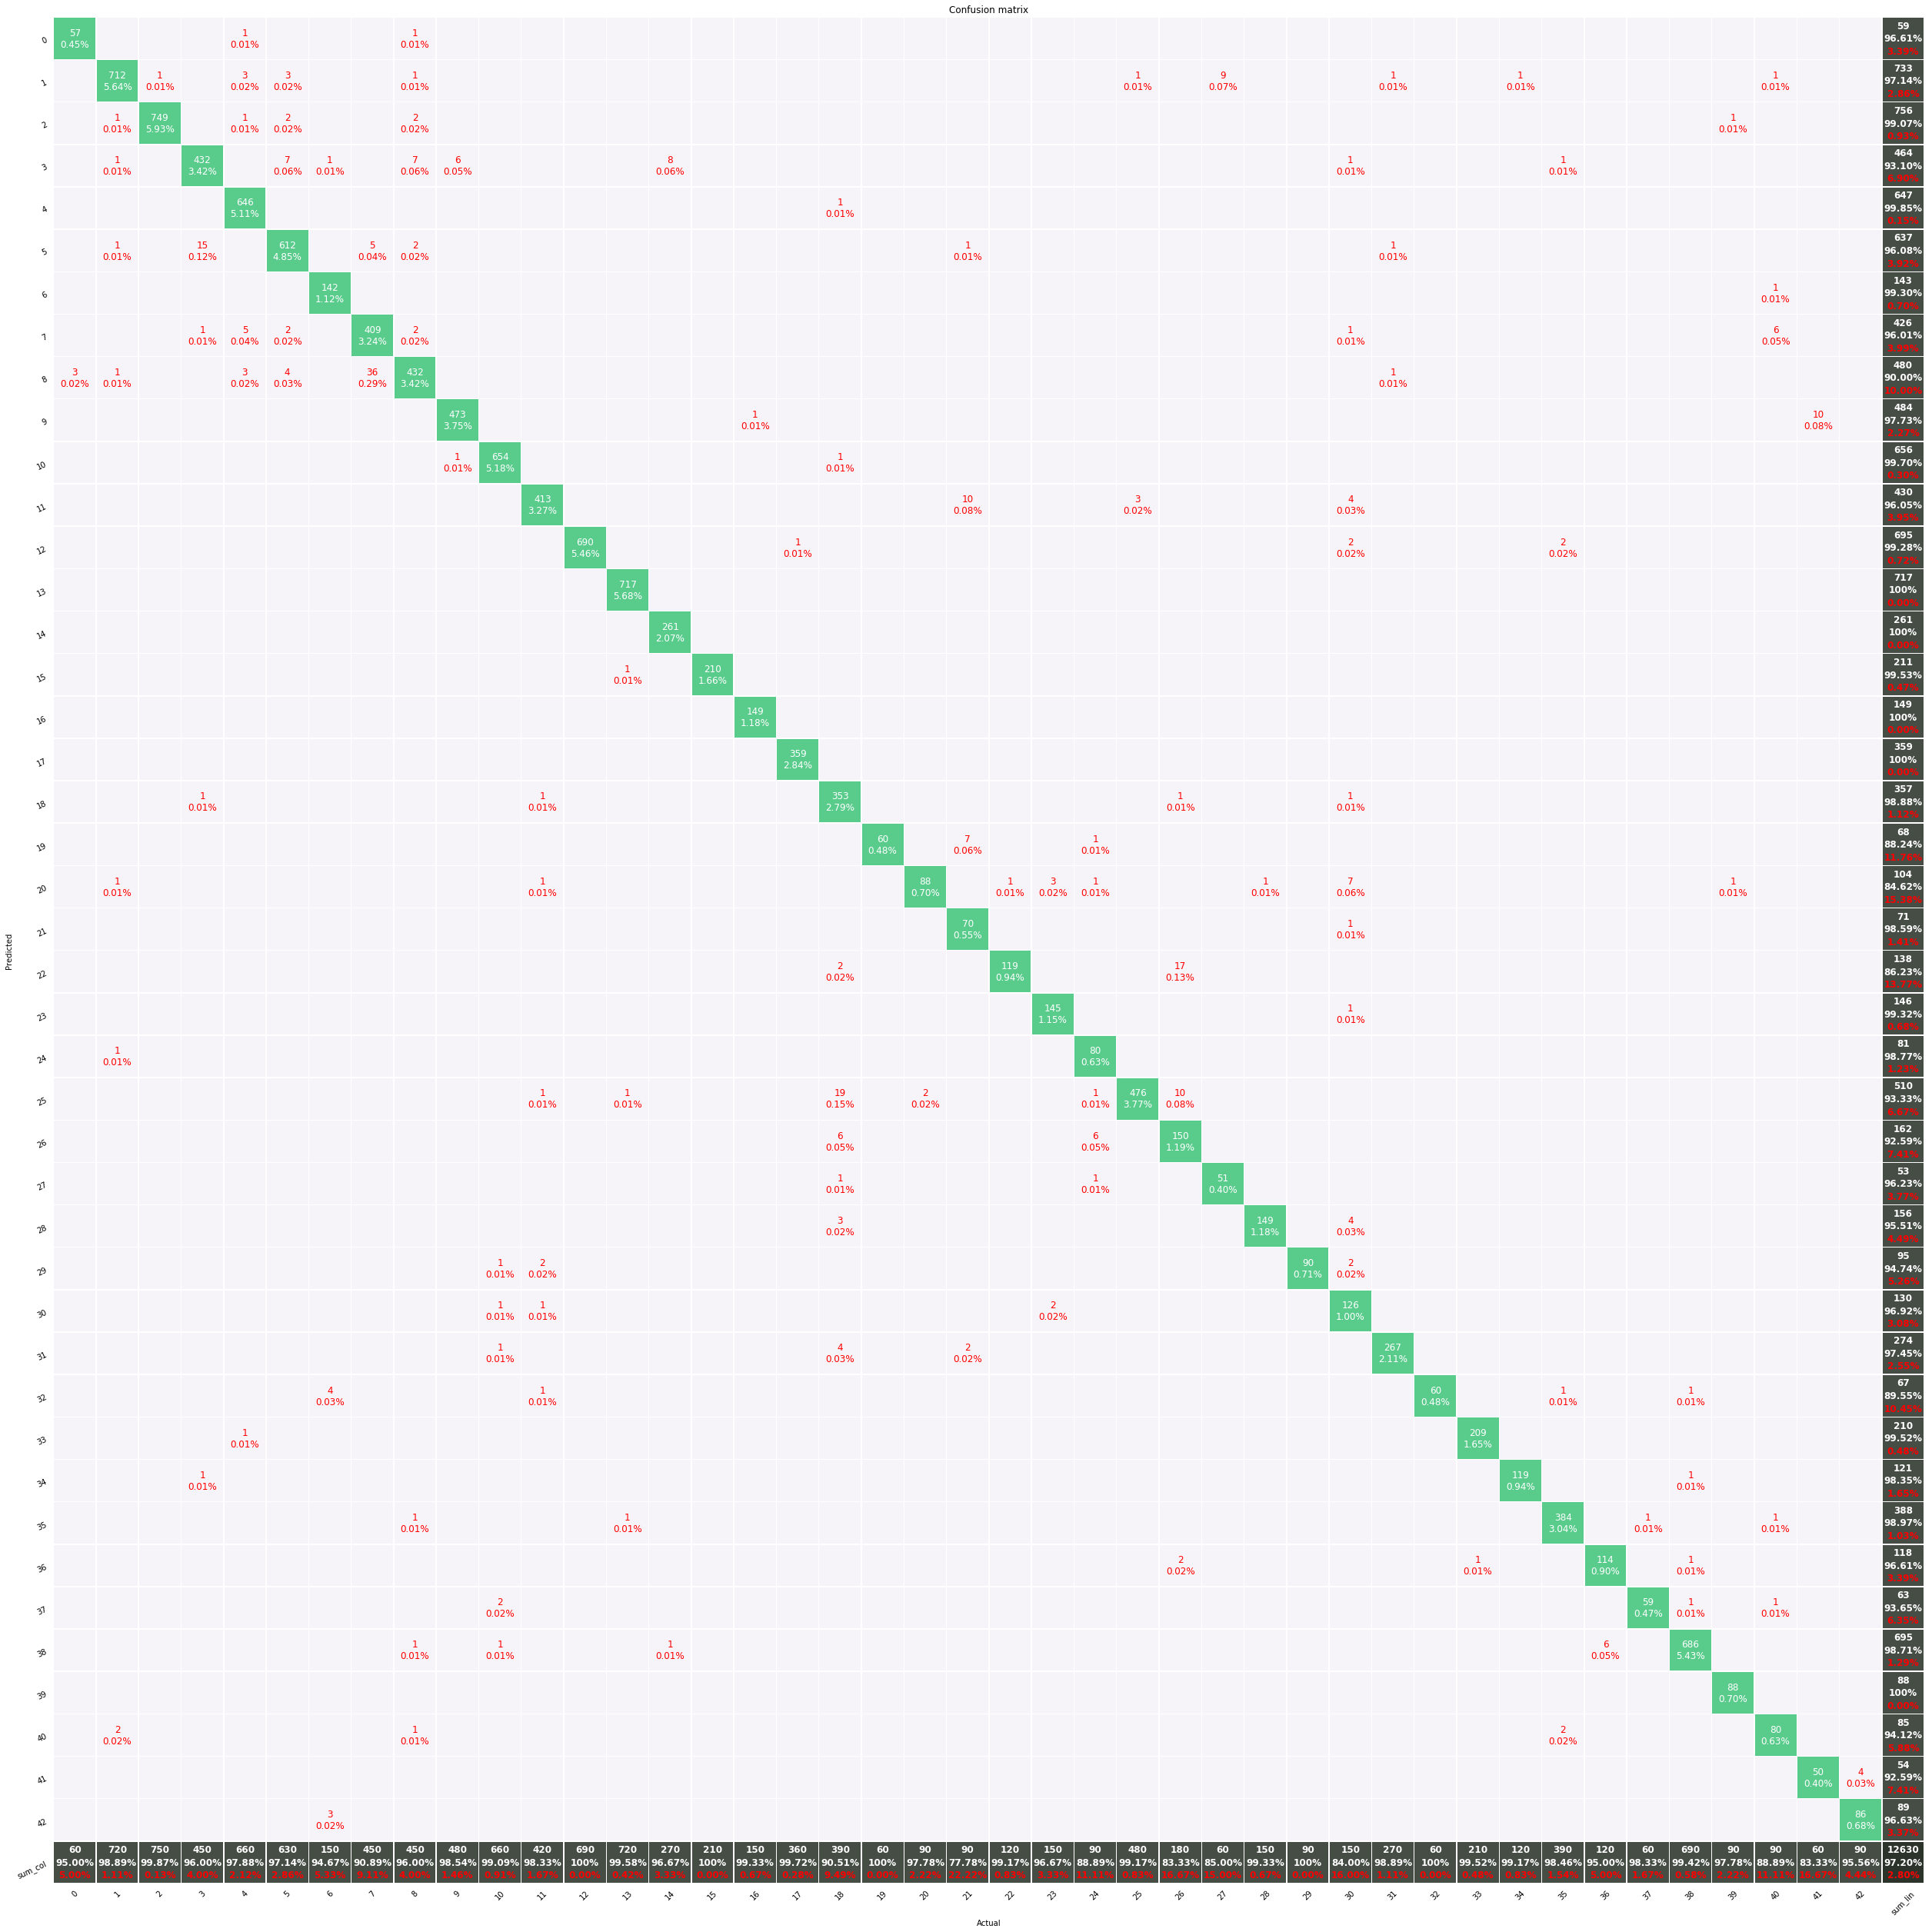

In [67]:
#### test
from sklearn.metrics import confusion_matrix

X_test_norm = zero_one_norm(X_test)

print(X_test_norm.shape)


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    saver.restore(sess, tf.train.latest_checkpoint('./sinnet_model/'))

    test_accuracy, predicted_y = evaluate(X_test_norm, y_test)
    
    predicted_y = np.concatenate(tuple(predicted_y), axis=0)
    
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    print(predicted_y.shape)

    
confuse_array = confusion_matrix(y_test, predicted_y)

print(confuse_array)


df_cm = DataFrame(confuse_array, index=range(n_classes), columns=range(n_classes))
#colormap: see this and choose your more dear
cmap = 'PuRd'

pretty_plot_confusion_matrix(df_cm, cmap=cmap, fz=12, figsize=[35,35])
   